In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import  r2_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [2]:
df=pd.read_csv('AB_NYC_2019.csv')

In [3]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [4]:
df.insert(0, 'ID', range(1, 1 + len(df)))
df.set_index("ID",inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 1 to 48895
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# EDA

In [7]:
# remove name,neighbourhood_group becasue there are in categorical data
df.drop(["name"],axis=1,inplace=True)
df.drop(["neighbourhood_group"],axis=1,inplace=True)

In [8]:
df.drop(["latitude"],axis=1,inplace=True)
df.drop(["longitude"],axis=1,inplace=True)
df.drop(["last_review"],axis=1,inplace=True)
df.drop(["reviews_per_month"],axis=1,inplace=True)

In [9]:
df_num=df.select_dtypes(['int64','float64'])

In [10]:
df_cat=df.select_dtypes(['object'])

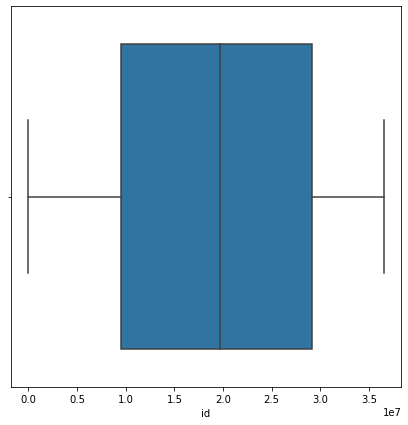

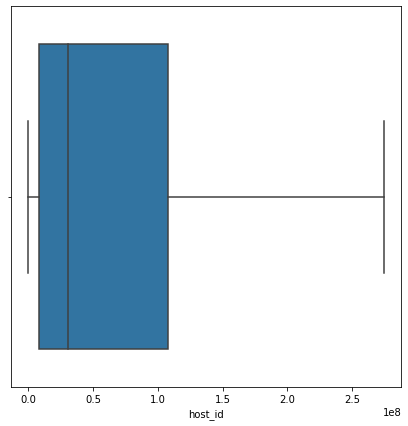

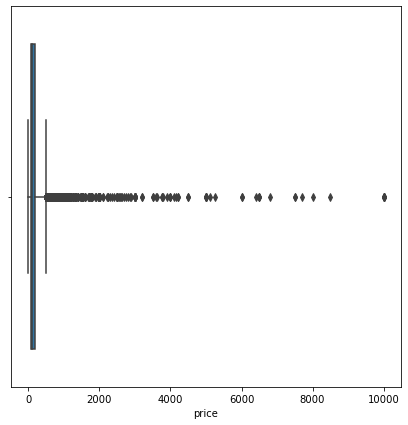

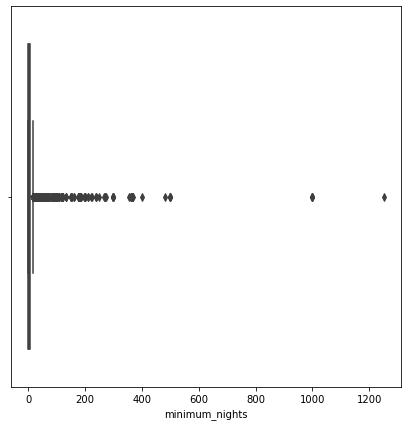

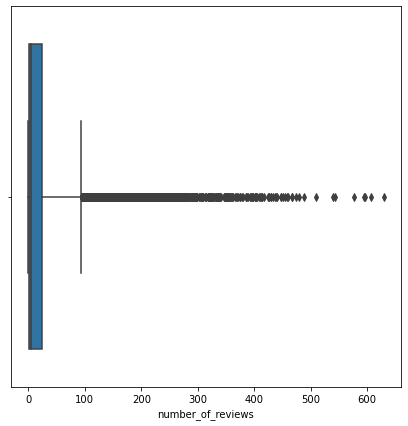

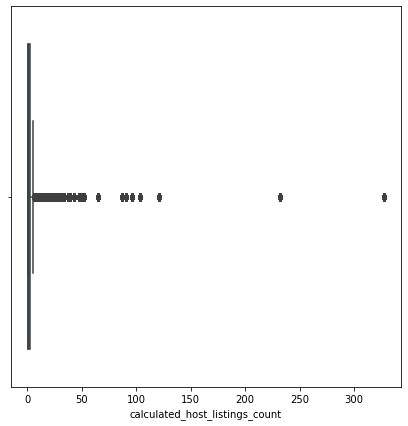

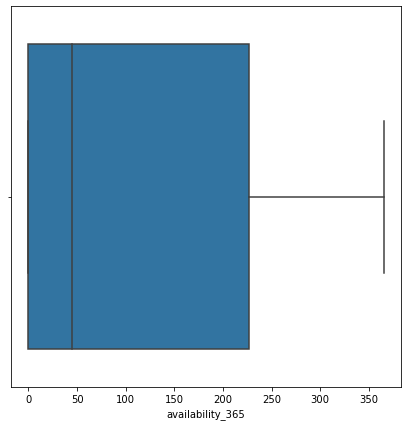

In [11]:
for i in df_num:
    plt.figure(figsize=(7,7))
    sns.boxplot(data=df_num,x=i,whis=3)
    # upper whisker = q3+1.5*IQR
    # lower whisker = q1 - 1.5*IQR 
    # boxplot will calculate upper whisker and lower whisker by it's own and the nit will plot the box
    plt.show()

In [12]:
df_num.shape

(48895, 7)

In [13]:
# price Column Outlier Treatment 
q1=np.quantile(df_num["price"],0.25)
q3=np.quantile(df_num["price"],0.75)
iqr=q3-q1
print("Quantile1 for price is => ",q1)
print("Quantile3 for price is => ",q3)
print("IQR for price column is => ",iqr)
#as we know we have higher extream values so no need to calculate lower whisker will only go for upper whisker 
up_whs=q3+3*iqr
print("upper whisker with 3 penalty is => ",up_whs)

# accept all those records which come below given whisker values
df_num=df_num[df_num["price"]<up_whs]
df_num.shape

Quantile1 for price is =>  69.0
Quantile3 for price is =>  175.0
IQR for price column is =>  106.0
upper whisker with 3 penalty is =>  493.0


(47567, 7)

In [14]:
# minimum_nights Column Outlier Treatment 
q1=np.quantile(df_num["minimum_nights"],0.25)
q3=np.quantile(df_num["minimum_nights"],0.75)
iqr=q3-q1
print("Quantile1 for minimum_nights is => ",q1)
print("Quantile3 for minimum_nights is => ",q3)
print("IQR for minimum_nights column is => ",iqr)
#as we know we have higher extream values so no need to calculate lower whisker will only go for upper whisker 
up_whs=q3+3*iqr
print("upper whisker with 3 penalty is => ",up_whs)

# accept all those records which come below given whisker values
df_num=df_num[df_num["minimum_nights"]<up_whs]
df_num.shape

Quantile1 for minimum_nights is =>  1.0
Quantile3 for minimum_nights is =>  5.0
IQR for minimum_nights column is =>  4.0
upper whisker with 3 penalty is =>  17.0


(42156, 7)

In [15]:
# number_of_reviews Column Outlier Treatment 
q1=np.quantile(df_num["number_of_reviews"],0.25)
q3=np.quantile(df_num["number_of_reviews"],0.75)
iqr=q3-q1
print("Quantile1 for number_of_reviews is => ",q1)
print("Quantile3 for number_of_reviews is => ",q3)
print("IQR for number_of_reviews column is => ",iqr)
#as we know we have higher extream values so no need to calculate lower whisker will only go for upper whisker 
up_whs=q3+3*iqr
print("upper whisker with 3 penalty is => ",up_whs)

# accept all those records which come below given whisker values
df_num=df_num[df_num["number_of_reviews"]<up_whs]
df_num.shape

Quantile1 for number_of_reviews is =>  1.0
Quantile3 for number_of_reviews is =>  27.0
IQR for number_of_reviews column is =>  26.0
upper whisker with 3 penalty is =>  105.0


(39430, 7)

In [16]:
# calculated_host_listings_count Column Outlier Treatment 
q1=np.quantile(df_num["calculated_host_listings_count"],0.25)
q3=np.quantile(df_num["calculated_host_listings_count"],0.75)
iqr=q3-q1
print("Quantile1 for calculated_host_listings_count is => ",q1)
print("Quantile3 for calculated_host_listings_count is => ",q3)
print("IQR for calculated_host_listings_count column is => ",iqr)
#as we know we have higher extream values so no need to calculate lower whisker will only go for upper whisker 
up_whs=q3+3*iqr
print("upper whisker with 3 penalty is => ",up_whs)

# accept all those records which come below given whisker values
df_num=df_num[df_num["calculated_host_listings_count"]<up_whs]
df_num.shape

Quantile1 for calculated_host_listings_count is =>  1.0
Quantile3 for calculated_host_listings_count is =>  2.0
IQR for calculated_host_listings_count column is =>  1.0
upper whisker with 3 penalty is =>  5.0


(36797, 7)

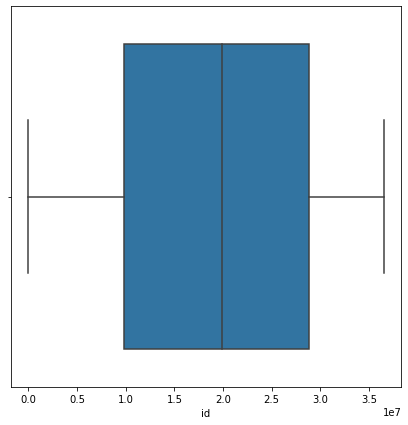

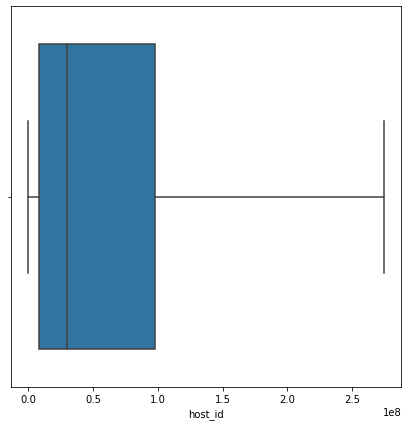

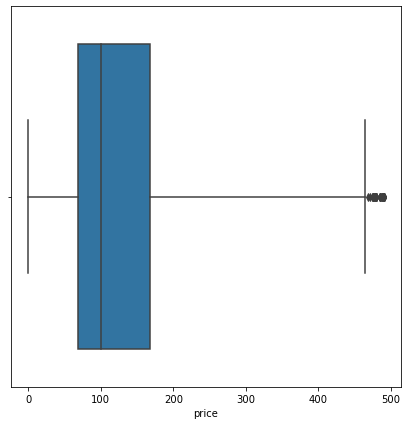

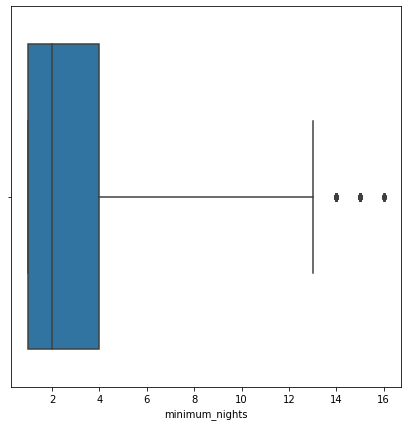

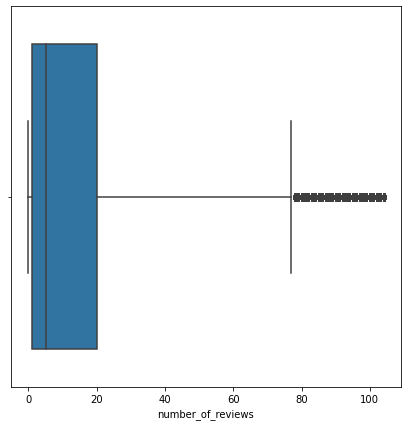

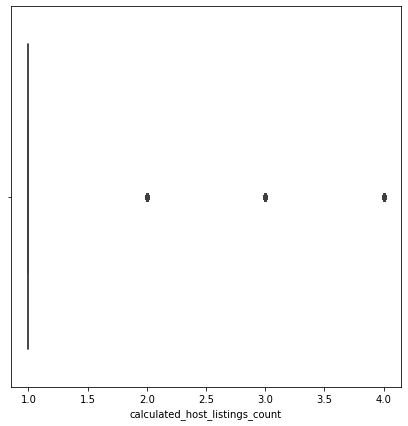

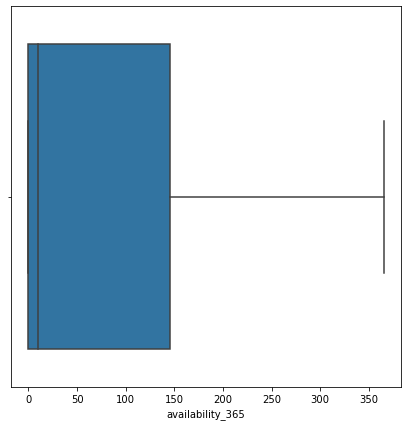

In [17]:
for i in df_num:
    plt.figure(figsize=(7,7))
    sns.boxplot(data=df_num,x=i,whis=3)
    # upper whisker = q3+1.5*IQR
    # lower whisker = q1 - 1.5*IQR 
    # boxplot will calculate upper whisker and lower whisker by it's own and the nit will plot the box
    plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder 

In [20]:
df_cat.columns

Index(['host_name', 'neighbourhood', 'room_type'], dtype='object')

In [22]:
df_cat

,host_name,neighbourhood,room_type
ID,,,
1,John,Kensington,Private room
2,Jennifer,Midtown,Entire home/apt
3,Elisabeth,Harlem,Private room
4,LisaRoxanne,Clinton Hill,Entire home/apt
5,Laura,East Harlem,Entire home/apt
...,...,...,...
48891,Sabrina,Bedford-Stuyvesant,Private room
48892,Marisol,Bushwick,Private room
48893,Ilgar & Aysel,Harlem,Entire home/apt


In [24]:
df_cat["host_name"].unique

<bound method Series.unique of ID
1                 John
2             Jennifer
3            Elisabeth
4          LisaRoxanne
5                Laura
             ...      
48891          Sabrina
48892          Marisol
48893    Ilgar & Aysel
48894              Taz
48895       Christophe
Name: host_name, Length: 48895, dtype: object>

In [25]:
df_cat['room_type']=pd.to_numeric(df['room_type'].str.replace('/','').str.replace(',', ''), errors='coerce')

In [27]:
le=LabelEncoder()
for col in df_cat:
    df_cat[col]=le.fit_transform(df_cat[col].astype(str))

In [29]:
df_new=pd.merge(df_num,df_cat,on="ID")

In [30]:
df_new

,id,host_id,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,host_name,neighbourhood,room_type
ID,,,,,,,,,,
2,2595,2845,225,1,45,2,355,4785,127,0
3,3647,4632,150,3,0,1,365,2909,94,0
5,5022,7192,80,10,9,1,0,5923,61,0
6,5099,7322,200,3,74,1,129,1931,137,0
11,5295,7702,135,5,53,1,6,6024,202,0
...,...,...,...,...,...,...,...,...,...,...
48890,36484363,107716952,65,1,0,2,163,7135,105,0
48891,36484665,8232441,70,2,0,2,9,9051,13,0
48892,36485057,6570630,40,4,0,2,36,6776,28,0


In [31]:
# import required modules 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

In [32]:
x=df_new.drop("price",axis=1)
y=df_new["price"]

In [33]:
#test Train model
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [34]:
# Model Training 
lr=LinearRegression() # object will be created
# llearning model on given data 
# use theta0+theta1x to calculate bestfit prediction line 
lr.fit(x_train,y_train)

LinearRegression()

In [37]:
# now model is trained and ready to predict 
# but before we use it for prediction let's check it's accuracy 
y_pred=lr.predict(x_test)

In [35]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score

In [38]:
mse=mean_squared_error(y_test,y_pred)
r2score=r2_score(y_test,y_pred)
print(" accuracy MSE is {} ".format(mse))
print(" accuracy R2 score is {} ".format(r2score))

 accuracy MSE is 6608.72882250768 
 accuracy R2 score is 0.04407718539536687 


# Deep Learning

In [53]:
ss = StandardScaler()
x = ss.fit_transform(x)

In [54]:
x.shape[1]

9

In [55]:
model = tf.keras.Sequential(
    [tf.keras.layers.Dense(2, activation="relu", input_shape=(x.shape[1], )),
     tf.keras.layers.Dense(5, activation="relu"),
     tf.keras.layers.Dense(3, activation="relu"),
     tf.keras.layers.Dense(1)]
)

In [56]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 2)                 20        
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 15        
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 4         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.compile(optimizer="sgd", loss="mse")

In [58]:
trained_model = model.fit(x_train, y_train, epochs=50, batch_size=20)

Epoch 1/50
1288/1288 [==============================] - 1s 480us/step - loss: 1799912186812275978403840.0000
Epoch 2/50
1288/1288 [==============================] - 1s 463us/step - loss: 6686.1805
Epoch 3/50
1288/1288 [==============================] - 1s 475us/step - loss: 6937.9541
Epoch 4/50
1288/1288 [==============================] - 1s 511us/step - loss: 6755.2410
Epoch 5/50
1288/1288 [==============================] - 1s 487us/step - loss: 6791.5730
Epoch 6/50
1288/1288 [==============================] - 1s 453us/step - loss: 6914.3750
Epoch 7/50
1288/1288 [==============================] - 1s 544us/step - loss: 6829.9921
Epoch 8/50
1288/1288 [==============================] - 1s 483us/step - loss: 6834.8913
Epoch 9/50
1288/1288 [==============================] - 1s 518us/step - loss: 6797.6994
Epoch 10/50
1288/1288 [==============================] - 1s 505us/step - loss: 6812.2218
Epoch 11/50
1288/1288 [==============================] - 1s 493us/step - loss: 6892.3565
Epoch 12/

In [59]:
# testing
y_hat = model.predict(x_test)

In [60]:
r2_score(y_test, y_hat)

-0.00013958187525808796